# Programming part

This is the second part of your midterm exam. In this notebook, we will test your understanding of the ff:

    1) Data Manipulation using Pandas and Numpy
    2) Setting up Iterations and Conditions
    3) Pulling Data from different APIs
    4) Combining datasets
    
    
# Import Statements

Import the necessary libraries that we will need (this is a given)    

In [ ]:
# Insert Student Name : Surname, First Name
student_name = 'Tizon, Eula Kathrina'

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import lyricsgenius
import json
import matplotlib.pyplot as plt
import datetime

In [ ]:
str(datetime.datetime.now())[:16]

'2023-11-09 18:22'

# Getting Time Series Data

You are tasked to compile 3 datasets that contains stocks data for analysis. You want to be able to get data from the top cloud providers in US:

    Amazon - 'AMZN'
    Google - 'GOOG'
    Microsoft - 'MSFT'
    
    
These datasets are found in different datasources :

    Excel - Minute Granularity
    CSV - Hourly Granularity
    API - Daily Granularity
    
    
## Task 1 :

Get Amazon, Google and Microsoft Data by opening the **excel file.**

Note that you have to make sure that the data you open is from the correct sheet.

Filename to open : `Stocks Data Minute Granularity.xlsx`

### Minute Granularity - Excel (5 Pts)

Open excel file and make sure that you make use of the `necessary parameters` to open the data properly.

In [ ]:
df_minute_granularity = pd.read_excel('./Stocks Data/Stocks Data Minute Granularity.xlsx',
                                      sheet_name = 'Complete Data',
                                      skiprows = 4)

In [ ]:
df_minute_granularity

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company
0,2023-04-18 09:30:00,107.000000,107.029999,106.010002,106.290001,106.290001,1002474,GOOG
1,2023-04-18 09:35:00,106.309998,106.650002,106.239998,106.559998,106.559998,309174,GOOG
2,2023-04-18 09:40:00,106.586098,107.050003,106.570000,106.730003,106.730003,333154,GOOG
3,2023-04-18 09:45:00,106.750000,107.025002,106.730003,106.930000,106.930000,413498,GOOG
4,2023-04-18 09:50:00,106.934998,107.029999,106.730003,107.019997,107.019997,311900,GOOG
...,...,...,...,...,...,...,...,...
11698,2023-06-28 15:40:00,128.899994,129.000000,128.889999,128.920105,128.920105,314728,AMZN
11699,2023-06-28 15:45:00,128.925003,128.964996,128.800003,128.899994,128.899994,413329,AMZN
11700,2023-06-28 15:50:00,128.895004,129.139999,128.800003,128.919998,128.919998,657493,AMZN
11701,2023-06-28 15:55:00,128.940002,129.110001,128.770004,129.089996,129.089996,2336238,AMZN


In [ ]:
assert len(df_minute_granularity['Company'].unique()) == 3
assert len(df_minute_granularity) == 11703
print('If you see this, you were able to get the correct data')

If you see this, you were able to get the correct data


#### Save the Data to a parquet file:

In [ ]:
# Do Not Delete This Cell
df_minute_granularity['Student Name'] = student_name
df_minute_granularity['Granularity'] = 'Minute'
df_minute_granularity['Datetime'] = pd.to_datetime(df_minute_granularity['Datetime']).dt.tz_localize(None)

In [ ]:
# Do Not Delete This Cell
df_minute_granularity.to_parquet(student_name +
                               ' ' +
                               str(datetime.datetime.now())[:16].replace(':','-') +
                               ' Minute Granularity.parquet', index=False)

In [ ]:
# Expected Output
df_minute_granularity

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company,Student Name,Granularity
0,2023-04-18 09:30:00,107.000000,107.029999,106.010002,106.290001,106.290001,1002474,GOOG,"Tizon, Eula Kathrina",Minute
1,2023-04-18 09:35:00,106.309998,106.650002,106.239998,106.559998,106.559998,309174,GOOG,"Tizon, Eula Kathrina",Minute
2,2023-04-18 09:40:00,106.586098,107.050003,106.570000,106.730003,106.730003,333154,GOOG,"Tizon, Eula Kathrina",Minute
3,2023-04-18 09:45:00,106.750000,107.025002,106.730003,106.930000,106.930000,413498,GOOG,"Tizon, Eula Kathrina",Minute
4,2023-04-18 09:50:00,106.934998,107.029999,106.730003,107.019997,107.019997,311900,GOOG,"Tizon, Eula Kathrina",Minute
...,...,...,...,...,...,...,...,...,...,...
11698,2023-06-28 15:40:00,128.899994,129.000000,128.889999,128.920105,128.920105,314728,AMZN,"Tizon, Eula Kathrina",Minute
11699,2023-06-28 15:45:00,128.925003,128.964996,128.800003,128.899994,128.899994,413329,AMZN,"Tizon, Eula Kathrina",Minute
11700,2023-06-28 15:50:00,128.895004,129.139999,128.800003,128.919998,128.919998,657493,AMZN,"Tizon, Eula Kathrina",Minute
11701,2023-06-28 15:55:00,128.940002,129.110001,128.770004,129.089996,129.089996,2336238,AMZN,"Tizon, Eula Kathrina",Minute


### Hour Granularity (5 Pts)

Open the csv file that contains the hourly stock data of Amazon, Google and Microsoft. Please make sure that you use all the necessary parameters.

Filename to open : `Stocks Data Hourly Granularity.csv`

In [ ]:
df_hour_granularity = pd.read_csv('./Stocks Data/Stocks Data Hourly Granularity.csv')

In [ ]:
assert len(df_hour_granularity['Company'].unique()) == 3
assert len(df_hour_granularity) == 1263
print('If you see this, you were able to get the correct data')

If you see this, you were able to get the correct data


#### Save the Data to a parquet file:

In [ ]:
# Do Not Delete This Cell
df_hour_granularity['Student Name'] = student_name
df_hour_granularity['Granularity'] = 'Hour'
df_hour_granularity['Datetime'] = pd.to_datetime(df_hour_granularity['Datetime']).dt.tz_localize(None)

In [ ]:
# Do Not Delete This Cell
df_hour_granularity.to_parquet(student_name +
                               ' ' +
                               str(datetime.datetime.now())[:16].replace(':','-') +
                               ' Hour Granularity.parquet', index=False)

In [ ]:
# Expected Output
df_hour_granularity

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company,Student Name,Granularity
0,2023-04-03 09:30:00,102.669998,104.120003,102.379997,104.000000,104.000000,4471209,GOOG,"Tizon, Eula Kathrina",Hour
1,2023-04-03 10:30:00,104.010002,104.059998,102.889999,103.320000,103.320000,2287842,GOOG,"Tizon, Eula Kathrina",Hour
2,2023-04-03 11:30:00,103.309998,103.680000,103.089996,103.612503,103.612503,1571703,GOOG,"Tizon, Eula Kathrina",Hour
3,2023-04-03 12:30:00,103.610001,103.735001,103.209999,103.285004,103.285004,1573913,GOOG,"Tizon, Eula Kathrina",Hour
4,2023-04-03 13:30:00,103.285004,103.480003,103.205002,103.449997,103.449997,1764386,GOOG,"Tizon, Eula Kathrina",Hour
...,...,...,...,...,...,...,...,...,...,...
1258,2023-06-28 12:30:00,129.800003,129.820007,128.440002,129.190002,129.190002,6620076,AMZN,"Tizon, Eula Kathrina",Hour
1259,2023-06-28 13:30:00,129.199997,129.490005,128.759995,129.352493,129.352493,4191600,AMZN,"Tizon, Eula Kathrina",Hour
1260,2023-06-28 14:30:00,129.358093,129.414993,128.574997,128.943497,128.943497,3804556,AMZN,"Tizon, Eula Kathrina",Hour
1261,2023-06-28 15:30:00,128.940002,129.139999,128.770004,129.089996,129.089996,4305588,AMZN,"Tizon, Eula Kathrina",Hour


### Day Granularity (5 Pts)

Using yFinance API, collect the **DAILY** data from google, microsoft and amazon from the **PAST 65 DAYS**. Make sure that it follows the **panel data representation**.

In your code, please dont forget to **.reset_index()** - this will allow you to convert the date index to become a column.

In [ ]:
# Get Data, given a certain list of tickers

# List of tickers
ticker_list = ['GOOG', 'MSFT', 'AMZN']

# Create a "basket"
df_day_granularity = pd.DataFrame()

for each in ticker_list:
    data = yf.download(tickers = each,
                       period = '65d',
                       interval = '1d')
    data['Company'] = each
    df_day_granularity = pd.concat([df_day_granularity, data])

# Reset index
df_day_granularity = df_day_granularity.reset_index()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
assert len(df_day_granularity['Company'].unique()) == 3
print('If you see this, you were able to get the correct data')

If you see this, you were able to get the correct data


#### Save the Data to a parquet file:

In [ ]:
# Do Not Delete This Cell
df_day_granularity.columns = ['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Company']
df_day_granularity['Student Name'] = student_name
df_day_granularity['Granularity'] = 'Day'
df_day_granularity['Datetime'] = pd.to_datetime(df_day_granularity['Datetime']).dt.tz_localize(None)

In [ ]:
df_day_granularity

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company,Student Name,Granularity
0,2023-08-09,132.190002,132.470001,129.505005,130.149994,130.149994,17745200,GOOG,"Tizon, Eula Kathrina",Day
1,2023-08-10,131.970001,132.647003,130.035004,130.210007,130.210007,17855700,GOOG,"Tizon, Eula Kathrina",Day
2,2023-08-11,129.201996,130.440002,128.750000,130.169998,130.169998,15191500,GOOG,"Tizon, Eula Kathrina",Day
3,2023-08-14,129.850006,131.910004,129.589996,131.830002,131.830002,17526200,GOOG,"Tizon, Eula Kathrina",Day
4,2023-08-15,131.589996,131.990005,129.819000,130.270004,130.270004,14769200,GOOG,"Tizon, Eula Kathrina",Day
...,...,...,...,...,...,...,...,...,...,...
190,2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMZN,"Tizon, Eula Kathrina",Day
191,2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMZN,"Tizon, Eula Kathrina",Day
192,2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMZN,"Tizon, Eula Kathrina",Day
193,2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMZN,"Tizon, Eula Kathrina",Day


In [ ]:
# Do Not Delete This Cell
df_day_granularity.to_parquet(student_name +
                               ' ' +
                               str(datetime.datetime.now())[:16].replace(':','-') +
                               ' Day Granularity.parquet', index=False)

In [ ]:
#Expected Output
df_day_granularity.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Company,Student Name,Granularity
0,2023-08-09,132.190002,132.470001,129.505005,130.149994,130.149994,17745200,GOOG,"Tizon, Eula Kathrina",Day
1,2023-08-10,131.970001,132.647003,130.035004,130.210007,130.210007,17855700,GOOG,"Tizon, Eula Kathrina",Day
2,2023-08-11,129.201996,130.440002,128.750000,130.169998,130.169998,15191500,GOOG,"Tizon, Eula Kathrina",Day
3,2023-08-14,129.850006,131.910004,129.589996,131.830002,131.830002,17526200,GOOG,"Tizon, Eula Kathrina",Day
4,2023-08-15,131.589996,131.990005,129.819000,130.270004,130.270004,14769200,GOOG,"Tizon, Eula Kathrina",Day


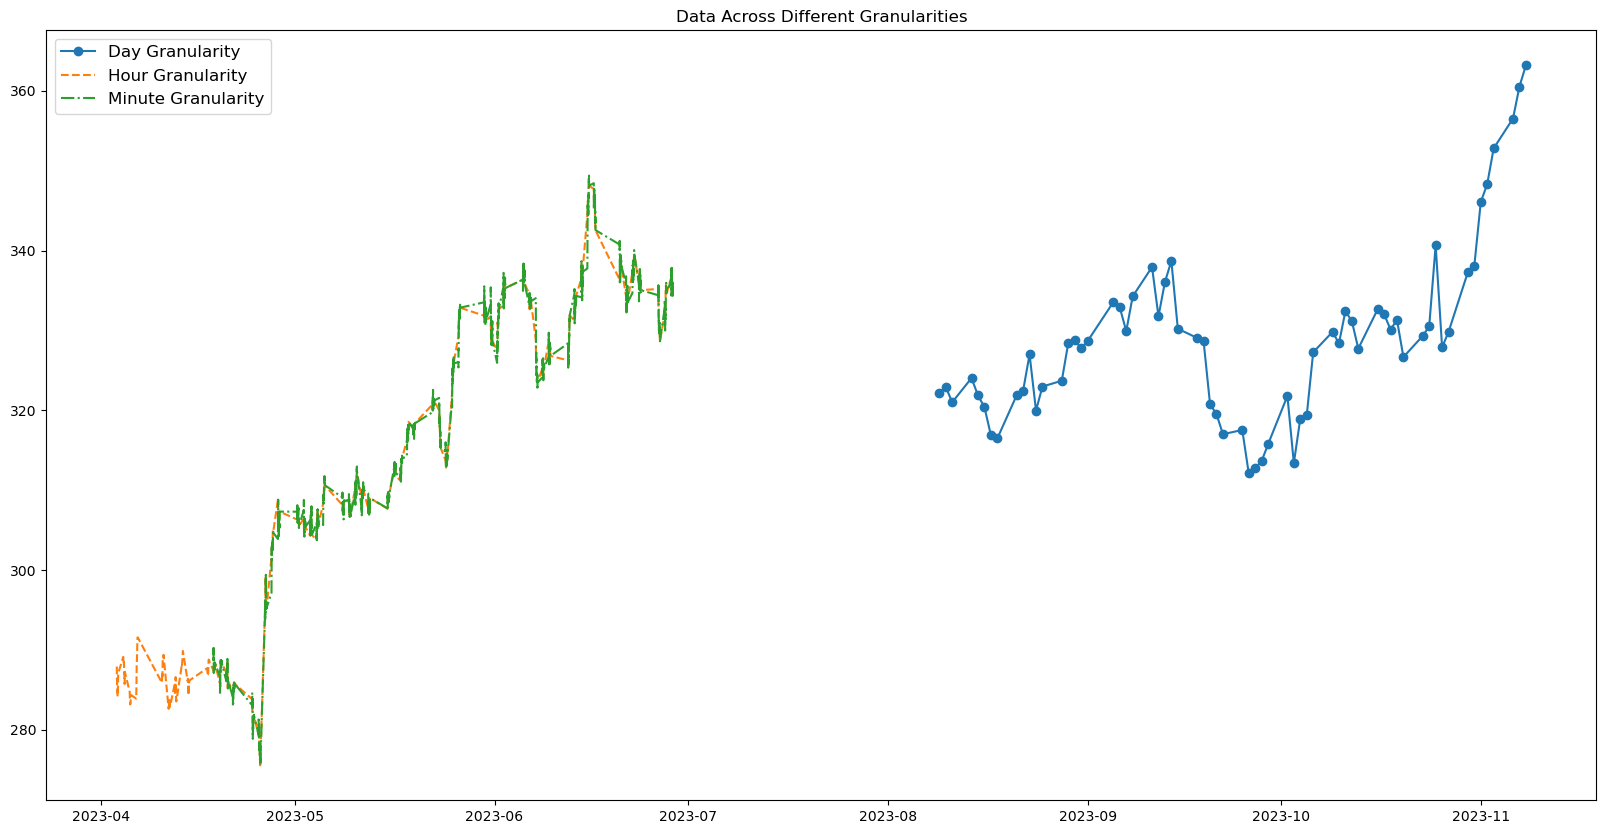

In [ ]:
# Double Checker
# Use this tool to guide you if youre in the right direction
# The trend should be the same, change the ticker val for other stocks
ticker_val = 'MSFT'

plt.figure(figsize=(20,10))
plt.title('Data Across Different Granularities')
plt.plot(df_day_granularity[df_day_granularity['Company'] == ticker_val]['Datetime'],
         df_day_granularity[df_day_granularity['Company'] == ticker_val]['Close'],
         marker='o', label='Day Granularity')


plt.plot(df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Datetime'],
         df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Close'],
         linestyle='--', label='Hour Granularity')

plt.plot(df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Datetime'],
         df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Close'],
         linestyle='-.', label='Minute Granularity')

plt.legend(fontsize=12);

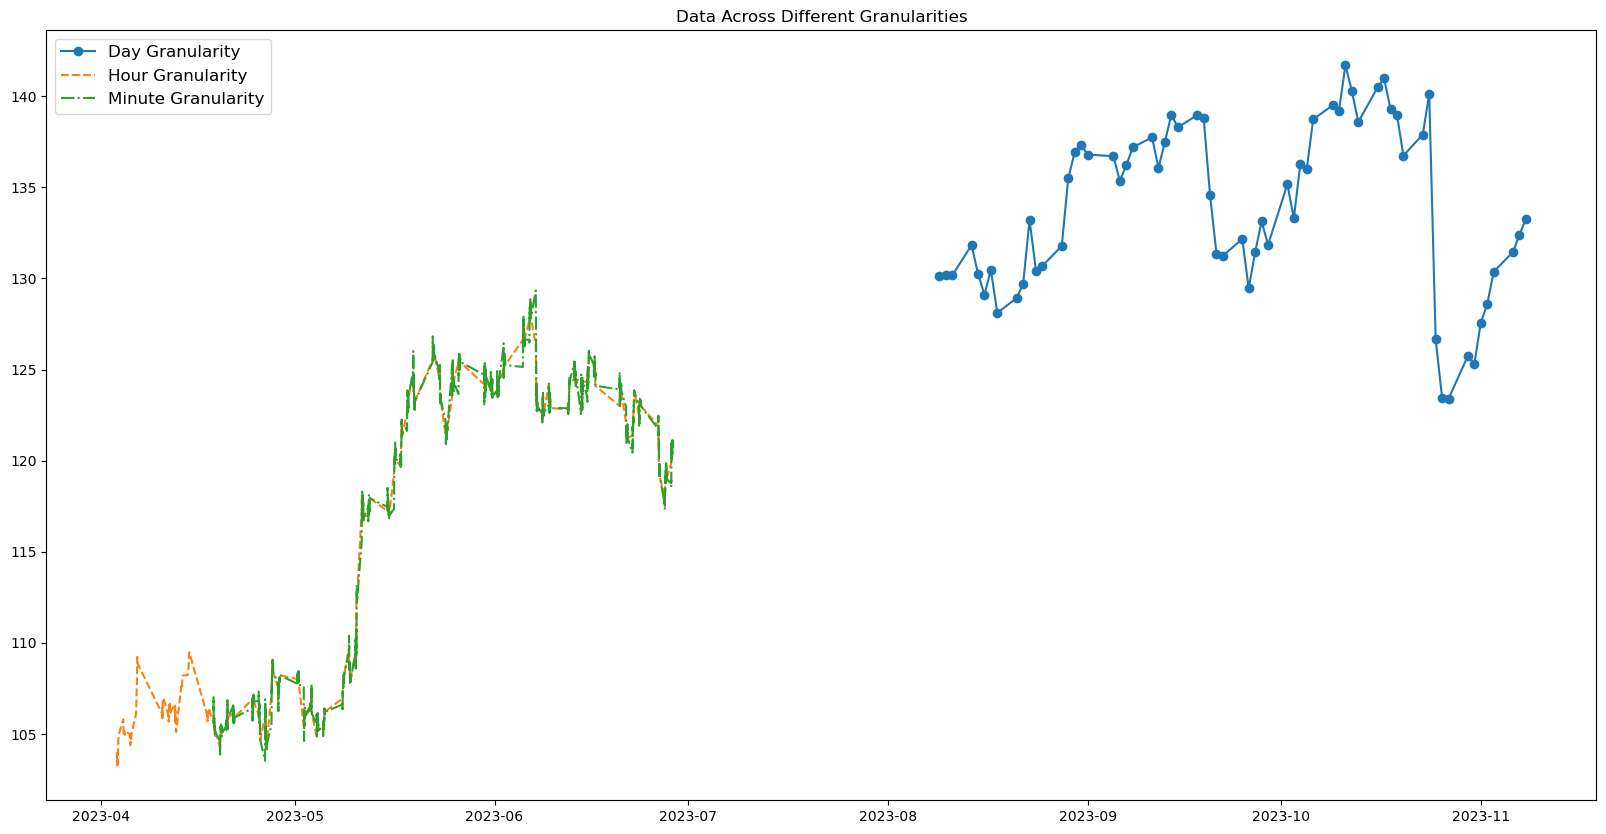

In [ ]:
# Double Checker
# Use this tool to guide you if youre in the right direction
# The trend should be the same, change the ticker val for other stocks
ticker_val = 'GOOG'

plt.figure(figsize=(20,10))
plt.title('Data Across Different Granularities')
plt.plot(df_day_granularity[df_day_granularity['Company'] == ticker_val]['Datetime'],
         df_day_granularity[df_day_granularity['Company'] == ticker_val]['Close'],
         marker='o', label='Day Granularity')


plt.plot(df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Datetime'],
         df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Close'],
         linestyle='--', label='Hour Granularity')

plt.plot(df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Datetime'],
         df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Close'],
         linestyle='-.', label='Minute Granularity')

plt.legend(fontsize=12);

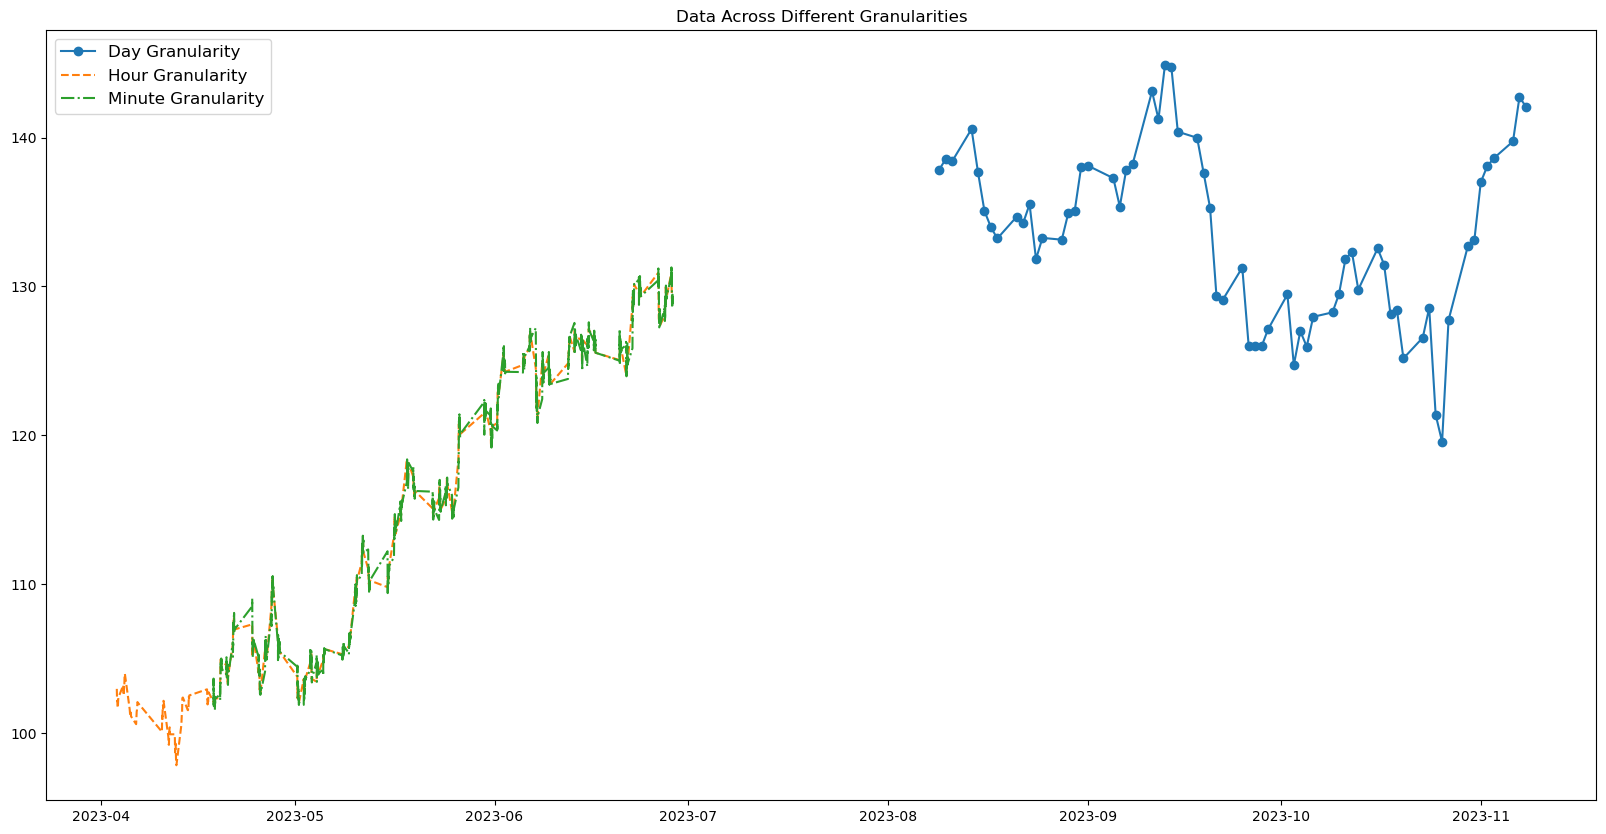

In [ ]:
# Double Checker
# Use this tool to guide you if youre in the right direction
# The trend should be the same, change the ticker val for other stocks
ticker_val = 'AMZN'

plt.figure(figsize=(20,10))
plt.title('Data Across Different Granularities')
plt.plot(df_day_granularity[df_day_granularity['Company'] == ticker_val]['Datetime'],
         df_day_granularity[df_day_granularity['Company'] == ticker_val]['Close'],
         marker='o', label='Day Granularity')


plt.plot(df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Datetime'],
         df_hour_granularity[df_hour_granularity['Company'] == ticker_val]['Close'],
         linestyle='--', label='Hour Granularity')

plt.plot(df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Datetime'],
         df_minute_granularity[df_minute_granularity['Company'] == ticker_val]['Close'],
         linestyle='-.', label='Minute Granularity')

plt.legend(fontsize=12);

## Task 2 :

Combine all of the dataset that you have opened namely:

    df_minute_granularity - minute data of google, microsoft and amazon
    
    df_hour_granularity - hour data of google, microsoft and amazon
    
    df_day_granularity - daily data of google, microsoft and amazon

### Combining Datasets (5 Pts)

After unifying the columnames, combine the three datasets and save it. Use the variable name `df_final_data`

In [ ]:
df_final_data = pd.concat([df_minute_granularity,
                           df_hour_granularity,
                           df_day_granularity],
                           ignore_index = True)

In [ ]:
# Do Not Delete This Cell
df_final_data['Granularity'].value_counts()

Minute    11703
Hour       1263
Day         195
Name: Granularity, dtype: int64

In [ ]:
# Do Not Delete This Cell
df_final_data.to_excel(student_name +
                               ' ' +
                               str(datetime.datetime.now())[:16].replace(':','-') +
                               ' Combined Data.xlsx', index=False)

## Task 3

### Loop and Conditions for Data Transformation: (5 Pts)


Using the `df_final_data` dataframe, create a loop that will transform the data following the mapping:

    GOOG - Google
    MSFT - Microsoft
    ALL OTHER TICKERS - Other Tech Companies
    
Use a loop and conditionals to implement this

In [ ]:
# Insert Loop + Data Transformation / Mapping here

data_transformed = []

for each in list(df_final_data['Company']):
    if each == 'GOOG':
        data_transformed.append('Google')
    elif each == 'MSFT':
        data_transformed.append('Microsoft')
    else:
        data_transformed.append('Other Tech Companies')

In [ ]:
# Do Not Delete This Cell
df_final_data['Company Tag'] = data_transformed

In [ ]:
# Do Not Delete This Cell
df_final_data['Company Tag'].value_counts()

Google                  4387
Microsoft               4387
Other Tech Companies    4387
Name: Company Tag, dtype: int64

In [ ]:
assert np.sum(np.sort(df_final_data['Company Tag'].unique()) == np.sort(['Google', 'Microsoft', 'Other Tech Companies'])) == 3
print('If you see this, you were able to get the correct data')

If you see this, you were able to get the correct data


In [ ]:
# Do Not Delete This Cell
df_final_data.to_excel(student_name +
                               ' ' +
                               str(datetime.datetime.now())[:16].replace(':','-') +
                               ' Transformed Data.xlsx', index=False)

In [ ]:
# Nothing Follows